In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans 
%matplotlib inline

In [4]:
spt = pd.read_csv('C:/Users/asus/Desktop/spotify_data/data.csv')
spt.head(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [5]:
song_features = pd.DataFrame()
scaler = MinMaxScaler()
for col in spt.iloc[:,:-1].columns:
    if spt[col].dtypes in ['float64','int64']:
        scaler.fit(spt[[col]])
        song_features[col] = scaler.transform(spt[col].values.reshape(-1,1)).ravel()

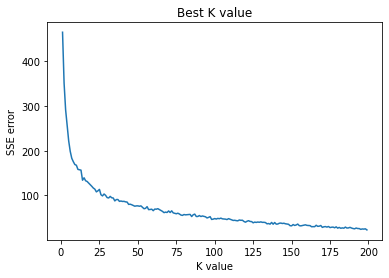

In [9]:
km = KMeans()
k_rng = range(1,200)
sse = []
for i in k_rng:
    km = KMeans(n_clusters=i)
    km.fit(song_features.sample(500))
    sse.append(km.inertia_)
    
plt.plot(k_rng,sse)
plt.xlabel('K value')
plt.ylabel('SSE error')
plt.title('Best K value')
plt.show()

In [10]:
km = KMeans(n_clusters=25)
predicted_genres = km.fit_predict(song_features)
song_features['predicted_genres'] = predicted_genres
song_features['predicted_genres'] = song_features['predicted_genres'].apply(lambda x: 'Genre' + str(x))
song_features.sample(10)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,predicted_genres
70203,0.013554,0.541498,0.039058,0.728,0.0,0.000000,0.909091,0.1330,0.876862,0.0,0.53,0.034056,0.590034,0.376,Genre3
158098,0.015361,0.685223,0.049348,0.529,0.0,0.026600,1.000000,0.1300,0.713022,0.0,0.35,0.032611,0.526115,0.921,Genre3
91843,0.928715,0.658907,0.024876,0.240,0.0,0.000000,0.181818,0.1410,0.702153,1.0,0.40,0.045304,0.463426,0.759,Genre2
36985,0.054618,0.418016,0.045821,0.890,0.0,0.000007,0.636364,0.1840,0.822990,1.0,0.43,0.077296,0.628405,0.707,Genre0
167782,0.350402,0.641700,0.013144,0.520,0.0,0.008250,0.454545,0.0893,0.786093,1.0,0.39,0.049432,0.475540,0.173,Genre12
127819,0.993976,0.378543,0.029154,0.173,0.0,0.027300,0.000000,0.2900,0.669110,1.0,0.00,0.038700,0.350910,0.339,Genre23
23879,0.549197,0.868421,0.042570,0.600,0.0,0.001130,0.181818,0.1320,0.835064,1.0,0.64,0.065015,0.434358,0.513,Genre17
44561,0.916667,0.405870,0.055384,0.274,0.0,0.000000,0.363636,0.1310,0.836191,0.0,0.22,0.034881,0.586347,0.125,Genre10
99347,0.997992,0.507085,0.038457,0.120,0.0,0.321000,0.454545,0.1130,0.760269,1.0,0.00,0.319917,0.316550,0.533,Genre2
141838,0.000554,0.747976,0.041338,0.565,0.0,0.001040,0.000000,0.0293,0.742197,1.0,0.49,0.068524,0.336899,0.707,Genre19


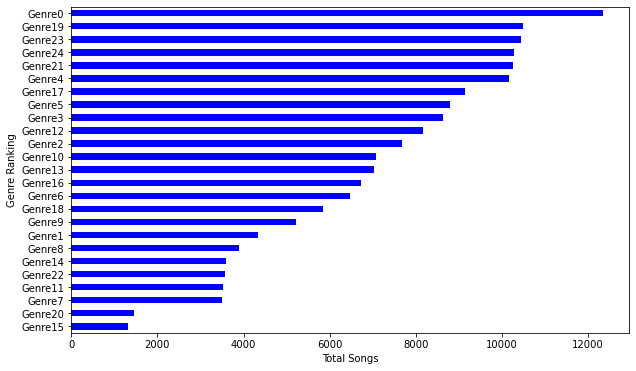

In [14]:
genres_grp = song_features.groupby(['predicted_genres']).size()
plt.figure(figsize=(10,6))
genres_grp.sort_values(ascending=True).plot.barh(color='blue')
plt.xlabel('Total Songs')
plt.ylabel('Genre Ranking')
plt.show()